**Import Required Libraries**

- Loads necessary libraries including Pandas and NumPy for data handling, scikit-learn for preprocessing and evaluation, and TensorFlow/Keras for building the regression model.


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

**Load and Clean the Dataset**

- Loads the housing dataset from a CSV file.
- Removes rows with missing values to ensure clean data for modeling.


In [17]:
df = pd.read_csv("/home/hrishikalanke/Ritesh/HousingData.csv")
df = df.dropna()

**Separate Features and Target Variable**

- Separates the dataset into features (`X`) and the target variable (`y`), which is the median house value (`MEDV`).


In [18]:
X = df.drop("MEDV", axis=1).values
y = df["MEDV"].values

**Normalize Features**

- Applies standardization to the feature values using `StandardScaler` to ensure all features have a mean of 0 and standard deviation of 1.


In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Split Data into Training and Testing Sets**

- Divides the data into 80% training and 20% testing sets to evaluate model performance on unseen data.


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Build Initial Regression Model (More Complex)**

- Constructs a neural network with:
  - One hidden layer of 128 neurons with ReLU.
  - A dropout layer to reduce overfitting.
  - A second hidden layer of 64 neurons.
  - A single output neuron for predicting continuous values (house prices).


In [21]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression
])

**Build Improved Regression Model (Simplified)**

- Constructs a simpler architecture with:
  - 64 and 32 neuron hidden layers.
  - Removes dropout for potentially better generalization.
  - Output layer still consists of a single neuron for regression.
- This model replaces the previous one.


In [22]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

**Compile the Model**

- Compiles the model with:
  - Adam optimizer for efficient training.
  - Mean Squared Error (MSE) as the loss function for regression.
  - Mean Absolute Error (MAE) as an additional evaluation metric.


In [23]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

**Train the Model**

- Trains the neural network for 200 epochs with a batch size of 16.
- Uses 10% of the training data for validation.
- Verbose output is enabled for monitoring progress.


In [24]:
model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 579.0019 - mae: 22.1331 - val_loss: 488.4299 - val_mae: 20.6250
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 527.7513 - mae: 20.9955 - val_loss: 431.4451 - val_mae: 19.1658
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 437.8790 - mae: 18.5141 - val_loss: 348.8145 - val_mae: 16.8963
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 328.9169 - mae: 15.8609 - val_loss: 240.9431 - val_mae: 13.4585
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 232.4998 - mae: 13.0737 - val_loss: 133.5420 - val_mae: 9.0129
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 127.5183 - mae: 9.3670 - val_loss: 74.3813 - val_mae: 6.1231
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 52.4579 - mae: 5.7398 - val_loss: 59.0998 - val_mae: 5.3888
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 47.5268 - mae: 5.1355 - val_loss: 44.0051 - val_mae: 4.6351
Epoch 9/200
18/18 ━━━━━━━━━━

**Predict House Prices**

- Uses the trained model to predict house prices on the test set.
- Flattens the predictions array for easier handling.


In [25]:
y_pred = model.predict(X_test).flatten()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


**Evaluate the Model**

- Calculates and prints:
  - Mean Squared Error (MSE) to measure average squared prediction error.
  - R² score to measure the proportion of variance explained by the model.


In [26]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [27]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 20.54
R² Score: 0.76


**Compare Predictions and Actual Values**

- Prints the first five predicted house prices alongside their actual values from the test set.


In [28]:
# Step 7: Make predictions
predictions = model.predict(X_test)

# You can now compare predictions with actual values
print(f"Predictions: {predictions[:5]}")
print(f"Actual Prices: {y_test[:5]}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Predictions: [[25.136833]
 [19.892397]
 [18.637177]
 [26.545406]
 [19.929705]]
Actual Prices: [25.  18.6 21.  23.5 17.5]


**Visualize Regression Results (Optional)**

- Uses Seaborn to plot predicted vs actual house prices for a small sample.
- Displays a regression line to visually assess how well predictions match true values.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


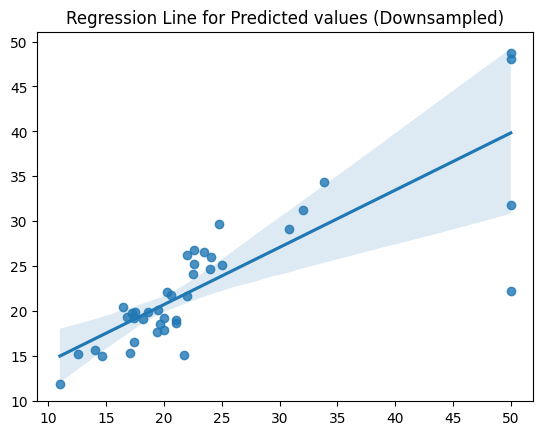

In [30]:
#OPTIONAL

import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
predictions = model.predict(X_test)

# Downsample the data (e.g., every 10th point)
sampled_y_test = y_test[:40]
sampled_predictions = predictions[:40]

# Plot regression line with the downsampled data
sns.regplot(x=sampled_y_test, y=sampled_predictions)
plt.title("Regression Line for Predicted values (Downsampled)")
plt.show()